# Data
## First approaches
### Imagery (Surface Reflectance)

In [ ]:
# description: https://www.usgs.gov/landsat-missions/landsat-collection-2-surface-reflectance
# metadata: https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/media/files/LSDS-1618_Landsat-4-7_C2-L2-ScienceProductGuide-v4.pdf

In [1]:
import xarray as xr
import rioxarray as rxr

In [58]:
red = rxr.open_rasterio("/Users/felixschulz/Library/CloudStorage/OneDrive-Persönlich/Dokumente/Uni/Master Thesis/data/imagery/landsat/Landsat 4-5 TM Collection 2 Level-2/LT05_L2SP_175084_19840609_20200918_02_T1/LT05_L2SP_175084_19840609_20200918_02_T1_SR_B4.TIF")
green = rxr.open_rasterio("/Users/felixschulz/Library/CloudStorage/OneDrive-Persönlich/Dokumente/Uni/Master Thesis/data/imagery/landsat/Landsat 4-5 TM Collection 2 Level-2/LT05_L2SP_175084_19840609_20200918_02_T1/LT05_L2SP_175084_19840609_20200918_02_T1_SR_B3.TIF")
blue = rxr.open_rasterio("/Users/felixschulz/Library/CloudStorage/OneDrive-Persönlich/Dokumente/Uni/Master Thesis/data/imagery/landsat/Landsat 4-5 TM Collection 2 Level-2/LT05_L2SP_175084_19840609_20200918_02_T1/LT05_L2SP_175084_19840609_20200918_02_T1_SR_B2.TIF")

In [ ]:
scaled_red = xr.where(red != 0, (red - 1) / (65535 - 1), 0)
scaled_green = xr.where(green != 0, (green - 1) / (65535 - 1), 0)
scaled_blue = xr.where(blue != 0, (blue - 1) / (65535 - 1), 0)

In [61]:
test = xr.combine_nested([green, red, blue], concat_dim = "band")

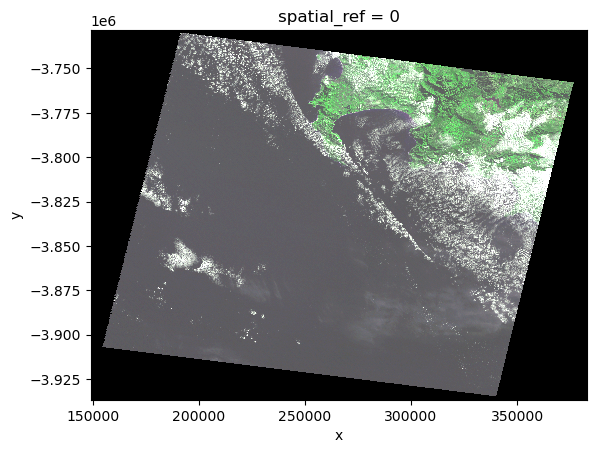

In [62]:
xr.plot.imshow(test, rgb = "band", robust = True)

In [63]:
cloud = rxr.open_rasterio("/Users/felixschulz/Library/CloudStorage/OneDrive-Persönlich/Dokumente/Uni/Master Thesis/data/imagery/landsat/Landsat 4-5 TM Collection 2 Level-2/LT05_L2SP_175084_19840609_20200918_02_T1/LT05_L2SP_175084_19840609_20200918_02_T1_SR_CLOUD_QA.TIF")

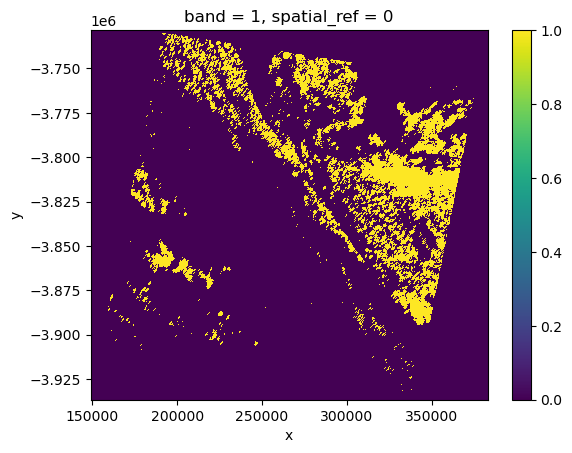

In [70]:
cloud.squeeze().isin([2, 34, 4, 12, 20, 36, 52, 8, 12, 24, 40, 56]).plot.imshow()

In [71]:
cloud_dist = rxr.open_rasterio("/Users/felixschulz/Library/CloudStorage/OneDrive-Persönlich/Dokumente/Uni/Master Thesis/data/imagery/landsat/Landsat 4-5 TM Collection 2 Level-2/LT05_L2SP_175084_19840609_20200918_02_T1/LT05_L2SP_175084_19840609_20200918_02_T1_ST_CDIST.TIF")

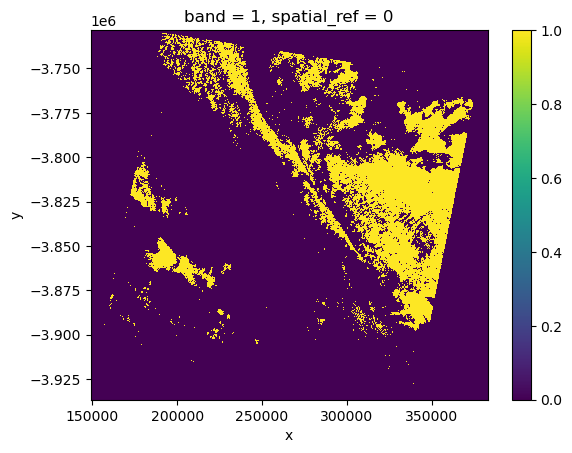

In [76]:
((cloud_dist.squeeze() > -5000) & (cloud_dist.squeeze() <= .1)).plot.imshow()

In [84]:
red_filtered = red.squeeze().where(cloud_dist.squeeze() > .1)

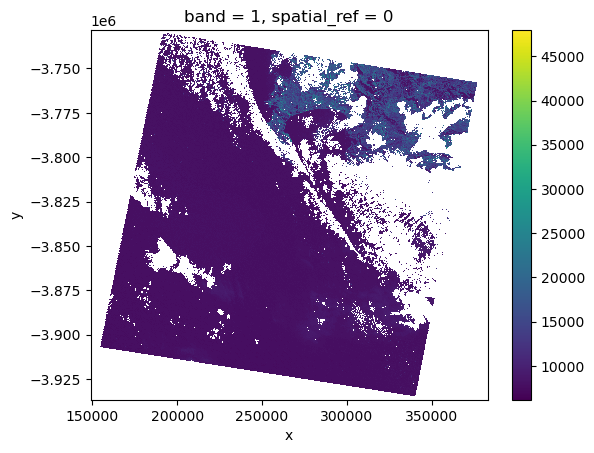

In [85]:
red_filtered.plot.imshow()

### Ground Truth (Land Cover)

In [ ]:
# viewer: https://land.copernicus.eu/global/lcviewer
# data: https://zenodo.org/record/3939038#.ZEY84i-21qs

In [2]:
import xarray as xr
import rioxarray as rxr
import numpy as np

In [2]:
cloud_dist = rxr.open_rasterio("/Users/felixschulz/Library/CloudStorage/OneDrive-Persönlich/Dokumente/Uni/Master Thesis/data/imagery/landsat/Landsat 4-5 TM Collection 2 Level-2/LT05_L2SP_175084_19840609_20200918_02_T1/LT05_L2SP_175084_19840609_20200918_02_T1_ST_CDIST.TIF")

In [6]:
land_cover = rxr.open_rasterio("/Users/felixschulz/Library/CloudStorage/OneDrive-Persönlich/Dokumente/Uni/Master Thesis/data/land cover/PROBAV_LC100_global_v3.0.1_2015-base_Discrete-Classification-map_EPSG-4326.tif")

In [17]:
land_cover_sample = land_cover.squeeze().rio.clip_box(*cloud_dist.rio.reproject("EPSG:4326").rio.bounds())

In [23]:
np.unique(land_cover_sample, return_counts = True)

(array([ 20,  30,  40,  50,  60,  80,  90, 112, 114, 115, 116, 122, 124,
        125, 126, 200], dtype=uint8),
 array([ 135584,  542080,  214011,   69897,     537,   14861,    5683,
           1597,     930,       6,   10442,       2,      72,       1,
          31826, 4080041]))

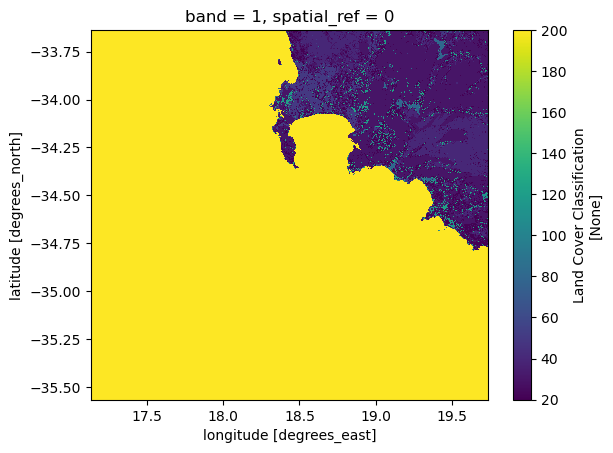

In [16]:
land_cover.squeeze().rio.clip_box(*cloud_dist.rio.reproject("EPSG:4326").rio.bounds()).plot.imshow()

### Auxiliary Data
#### Biome Clusters

In [5]:
import geopandas as gpd

In [8]:
# biome clusters
# see https://zenodo.org/record/5848610#.ZEZ4Py-21qs
biome_clusters = gpd.read_file("/Users/felixschulz/Library/CloudStorage/OneDrive-Persönlich/Dokumente/Uni/Master Thesis/data/biome clusters/biome_cluster_shapefile/ProbaV_UTM_LC100_biome_clusters_V3_global.shp")

<Axes: >

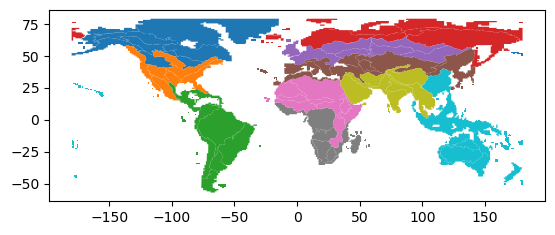

In [14]:
biome_clusters.plot(column = "bc_id")

#### Elevation

In [15]:
import xarray as xr
import rioxarray as rxr

In [17]:
# https://www.usgs.gov/centers/eros/science/usgs-eros-archive-digital-elevation-shuttle-radar-topography-mission-srtm-1
elevation = rxr.open_rasterio("/Users/felixschulz/Library/CloudStorage/OneDrive-Persönlich/Dokumente/Uni/Master Thesis/data/DTM/srtm_40_19/srtm_40_19.tif")

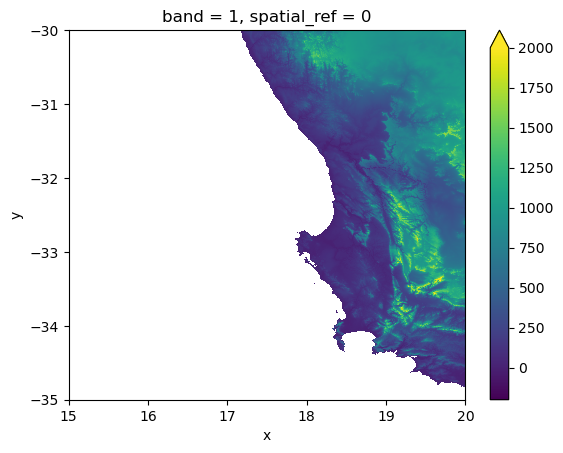

In [20]:
elevation.where(elevation >= -200).squeeze().plot.imshow(vmin = -200, vmax = 2000)